In [1]:
#Hard copy for Formax notebooks
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from tqdm import trange, tqdm
import pickle
from datetime import datetime

from hackathon.utils.utils import *

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%autoreload 2

In [2]:
ftl_df_raw_1 = pd.read_csv('../data/merged_data/ftl.csv')
ftl_df_raw_2 = pd.read_csv('../data/test_set/ftl.csv')
ftl_df_raw_1.head()
ftl_df_raw_2.head()

,ut_ms,ute_ms,type,flagcomms
0,1420071423000,1420073638000,INERTIAL,False
1,1420073638000,1420074838000,SLEW,False
2,1420074838000,1420082167000,EARTH,False
3,1420082167000,1420084298000,SLEW,False
4,1420084298000,1420088038000,D4PNPO,False


In [3]:
# Copied functions to properly load ftl - modified
def to_datetime(df, time_col='ut_ms'):
    """
    Converts UCT timestamp [ms] to datetime in a dataframe
    """
    df[time_col] = pd.to_datetime(df[time_col], unit='ms')
    return df

def ftl_data(filename, time_col_1='ut_ms', time_col_2 = "ute_ms"):
    """
    Read a dataframe and prepare the time axis
    """
    df = pd.read_csv(filename)
    df = to_datetime(df, time_col=time_col_1)
    df = to_datetime(df,time_col=time_col_2)
    df = df.set_index(time_col_1)
    return df

#ftl_df_1 = ftl_data('../data/merged_data/ftl.csv')
#ftl_df_2 = ftl_data('../data/test_set/ftl.csv')

ftl_dat = ftl_data('../data/hackathon/context--2014-01-01_2015-01-01--ftl.csv')
ftl_dat_test = ftl_data('../data/hackathon/context--2015-01-01_2015-07-01--ftl.csv')
ftl_dat = pd.concat([ftl_dat,ftl_dat_test])

In [4]:
ftl_dat.columns

Index([u'ute_ms', u'type', u'flagcomms'], dtype='object')

In [5]:
ftl_dat.index = ftl_dat['ute_ms']
ftl_dat.index = ftl_dat.index.set_names('ut_ms')

In [6]:
ftl_dat.shape

(12345, 3)

In [7]:
names = ftl_dat['type'].unique()

In [8]:
#Create count columns for ftl types
for name in names:
    ftl_dat[name] = ftl_dat['type'] == name
    ftl_dat[name] = ftl_dat[name].astype('int')

In [9]:
ftl_dat.head()

,ute_ms,type,flagcomms,SLEW,EARTH,MAINTENANCE,WARMUP,ACROSS_TRACK,D4PNPO,NADIR,INERTIAL,D9PSPO,D3POCM,D2PLND,SPECULAR,D1PVMC,D8PLTP,D7PLTS
ut_ms,,,,,,,,,,,,,,,,,,
2014-01-01 01:34:37,2014-01-01 01:34:37,SLEW,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 01:59:07,2014-01-01 01:59:07,EARTH,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 03:29:07,2014-01-01 03:29:07,MAINTENANCE,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 05:05:23,2014-01-01 05:05:23,WARMUP,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 05:35:23,2014-01-01 05:35:23,SLEW,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
ftl_dat['flagcomms'] = ftl_dat['flagcomms'].astype('int')
ftl_dat.drop(['ute_ms','type'], axis=1, inplace=True)
ftl_dat.head()

,flagcomms,SLEW,EARTH,MAINTENANCE,WARMUP,ACROSS_TRACK,D4PNPO,NADIR,INERTIAL,D9PSPO,D3POCM,D2PLND,SPECULAR,D1PVMC,D8PLTP,D7PLTS
ut_ms,,,,,,,,,,,,,,,,
2014-01-01 01:34:37,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 01:59:07,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 03:29:07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 05:05:23,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 05:35:23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
ftl_dat['ut_ms'] = ftl_dat.index.map(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour))

In [12]:
ftl_hour = ftl_dat.groupby(['ut_ms']).sum()

/home/kinshiryuu-burp/anaconda3/envs/nitinol/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'ut_ms' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [13]:
#Save ftl data
ftl_hour.to_csv("../data/hackathon/ftl_dat.csv")

In [16]:
ftl_hour.head()

,flagcomms,SLEW,EARTH,MAINTENANCE,WARMUP,ACROSS_TRACK,D4PNPO,NADIR,INERTIAL,D9PSPO,D3POCM,D2PLND,SPECULAR,D1PVMC,D8PLTP,D7PLTS
ut_ms,,,,,,,,,,,,,,,,
2014-01-01 01:00:00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 03:00:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 05:00:00,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 06:00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-01 07:00:00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
ftl_df = ftl_df_1

In [42]:
ftl_df.columns

Index([u'ute_ms', u'type', u'flagcomms'], dtype='object')

In [50]:
ftl_df.index = ftl_df['ute_ms']
ftl_df.index = ftl_df.index.set_names('ut_ms')

In [51]:
ftl_df.head()

,ute_ms,type,flagcomms
ut_ms,,,
2008-08-22 00:38:14,2008-08-22 00:38:14,EARTH,False
2008-08-22 01:45:55,2008-08-22 01:45:55,EARTH,True
2008-08-22 01:46:59,2008-08-22 01:46:59,EARTH,False
2008-08-22 01:57:33,2008-08-22 01:57:33,SLEW,False
2008-08-22 02:44:53,2008-08-22 02:44:53,NADIR,False


In [52]:
ftl_df.shape

(64253, 3)

In [53]:
names = ftl_df['type'].unique()

In [54]:
names

array(['EARTH', 'SLEW', 'NADIR', 'MAINTENANCE', 'INERTIAL', 'ACROSS_TRACK',
       'WARMUP', 'D1PVMC', 'RADIO_SCIENCE', 'SPECULAR', 'D4PNPO', 'D3POCM',
       'D2PLND', 'D5PPHB', 'D7PLTS', 'D8PLTP', 'SPOT', 'D9PSPO'], dtype=object)

In [55]:
for name in names:
    ftl_df[name] = ftl_df['type'] == name
    ftl_df[name] = ftl_df[name].astype('int')

In [56]:
ftl_df['flagcomms'] = ftl_df['flagcomms'].astype('int')
ftl_df.drop(['ute_ms','type'], axis=1, inplace=True)
ftl_df.head()

,flagcomms,EARTH,SLEW,NADIR,MAINTENANCE,INERTIAL,ACROSS_TRACK,WARMUP,D1PVMC,RADIO_SCIENCE,SPECULAR,D4PNPO,D3POCM,D2PLND,D5PPHB,D7PLTS,D8PLTP,SPOT,D9PSPO
ut_ms,,,,,,,,,,,,,,,,,,,
2008-08-22 00:38:14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 01:45:55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 01:46:59,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 01:57:33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 02:44:53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
ftl_df['ut_ms'] = ftl_df.index.map(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour))

In [58]:
ftl_hour = ftl_df.groupby(['ut_ms']).sum()

/home/kinshiryuu-burp/anaconda3/envs/nitinol/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'ut_ms' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [59]:
ftl_hour.head()

,flagcomms,EARTH,SLEW,NADIR,MAINTENANCE,INERTIAL,ACROSS_TRACK,WARMUP,D1PVMC,RADIO_SCIENCE,SPECULAR,D4PNPO,D3POCM,D2PLND,D5PPHB,D7PLTS,D8PLTP,SPOT,D9PSPO
ut_ms,,,,,,,,,,,,,,,,,,,
2008-08-22 00:00:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 01:00:00,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 02:00:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 03:00:00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-22 04:00:00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
names = ftl_df.columns.values
names

array(['flagcomms', 'EARTH', 'SLEW', 'NADIR', 'MAINTENANCE', 'INERTIAL',
       'ACROSS_TRACK', 'WARMUP', 'D1PVMC', 'RADIO_SCIENCE', 'SPECULAR',
       'D4PNPO', 'D3POCM', 'D2PLND', 'D5PPHB', 'D7PLTS', 'D8PLTP', 'SPOT',
       'D9PSPO', 'ut_ms'], dtype=object)

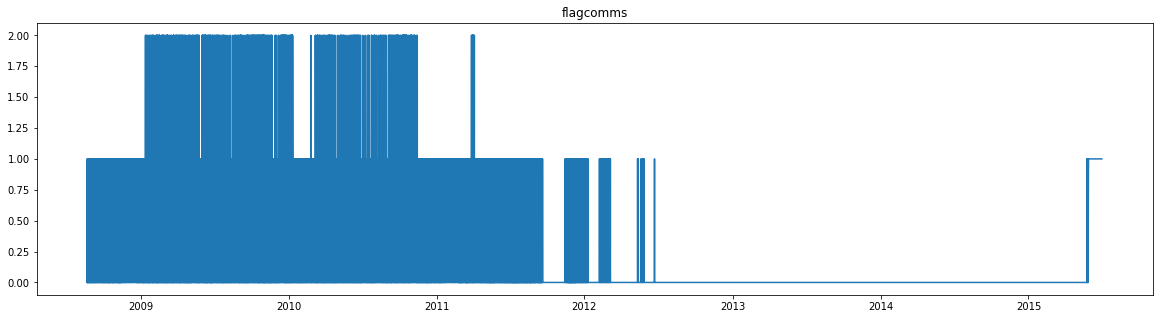

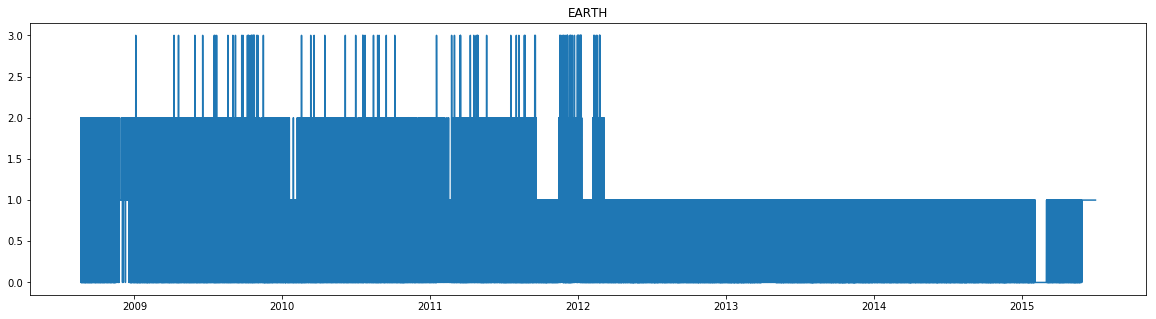

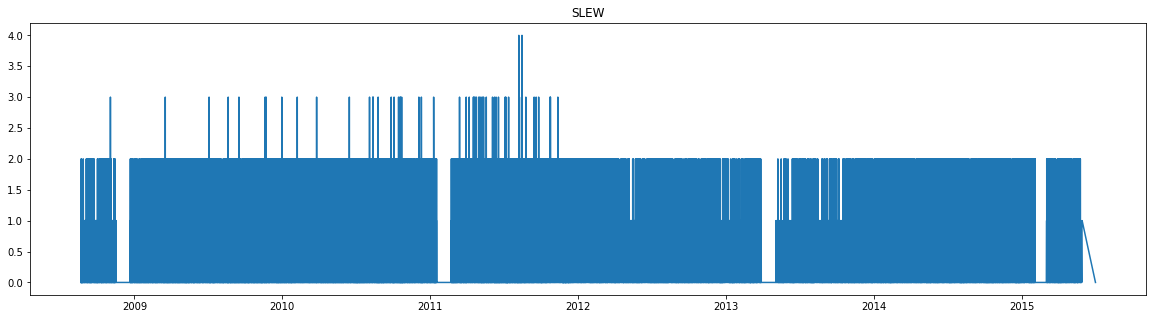

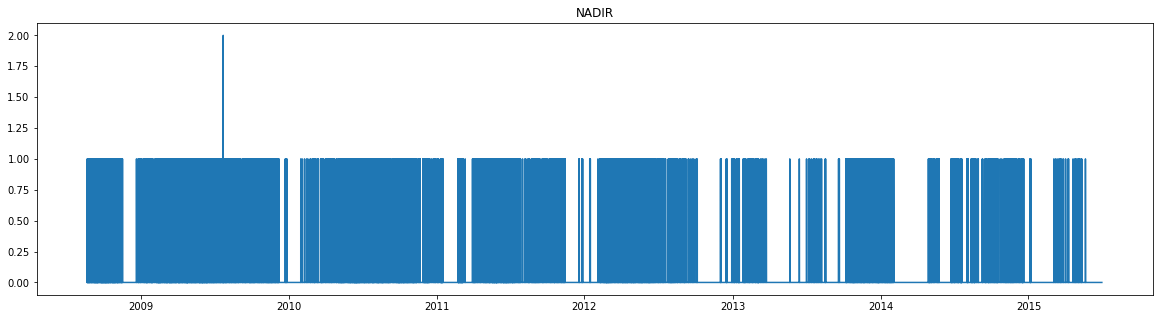

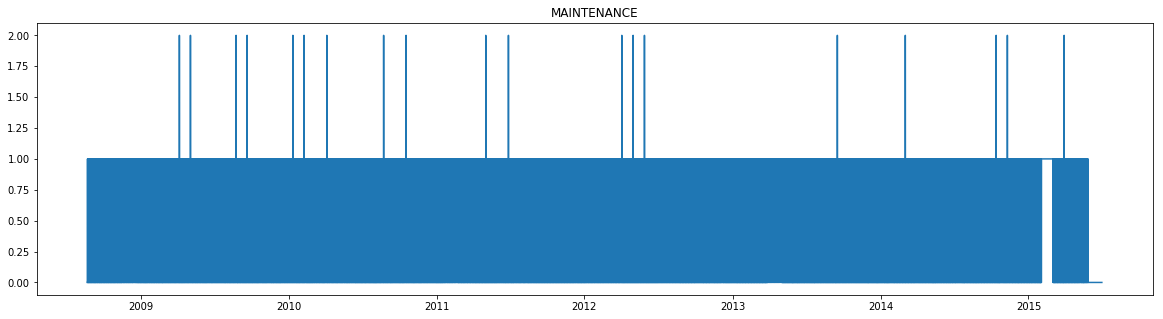

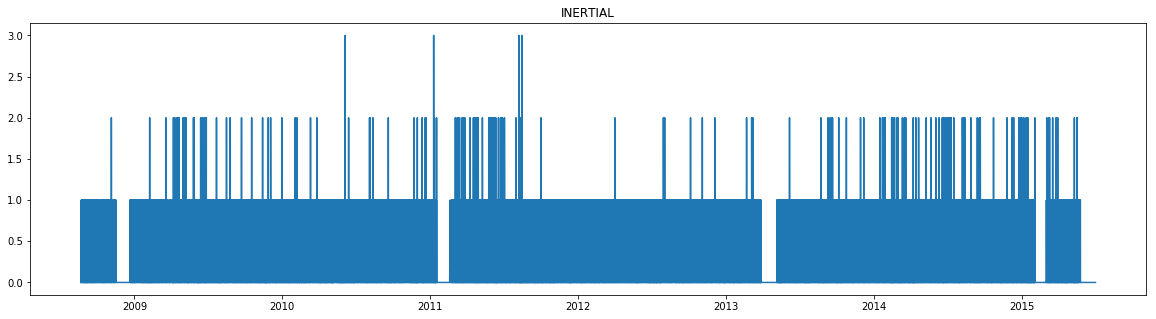

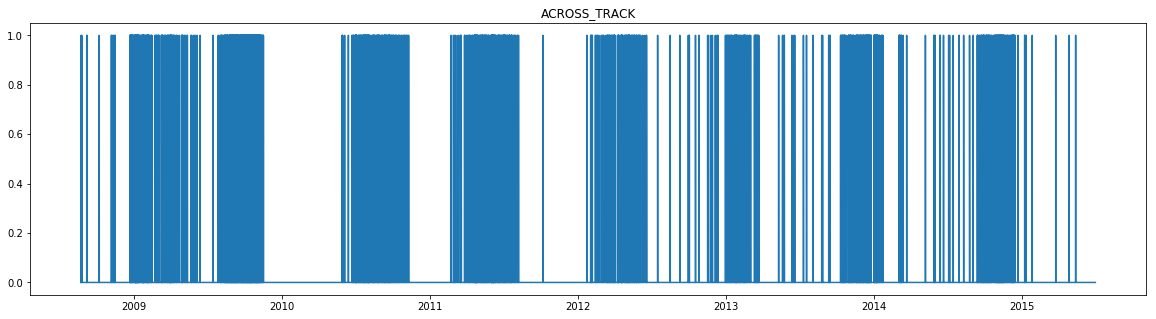

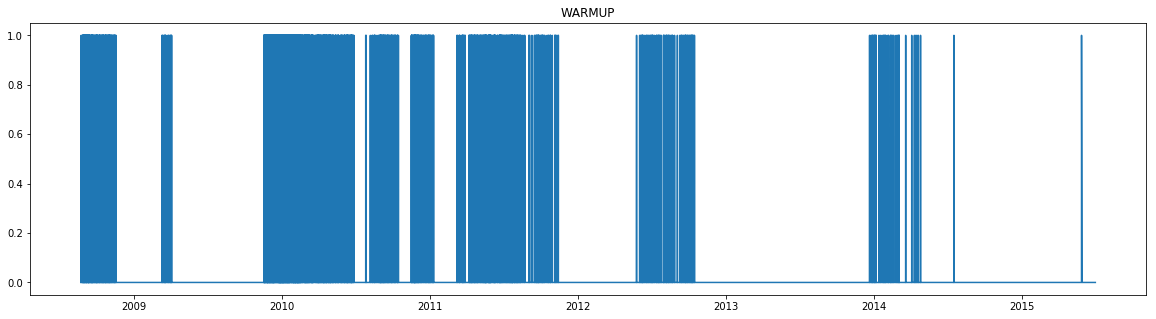

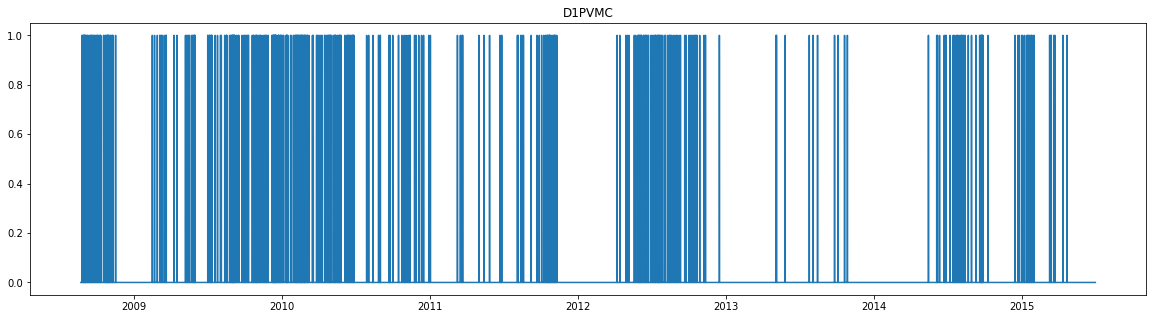

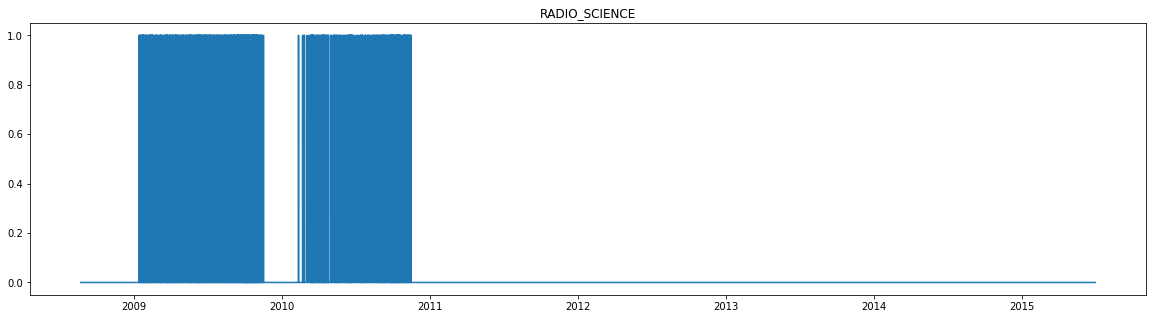

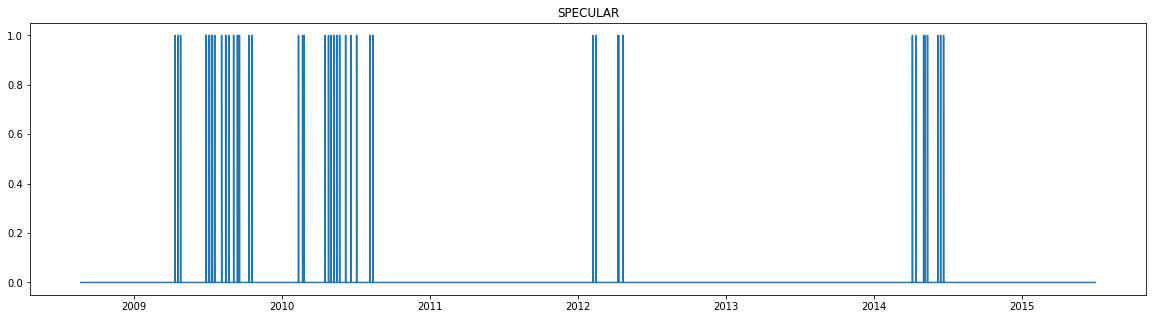

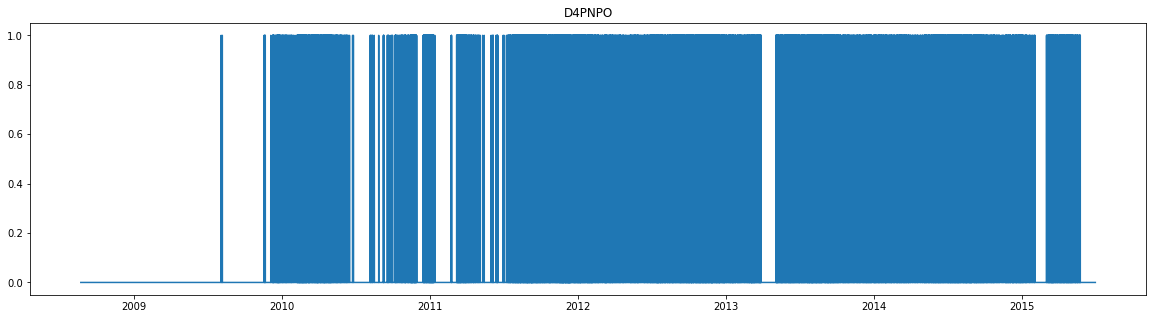

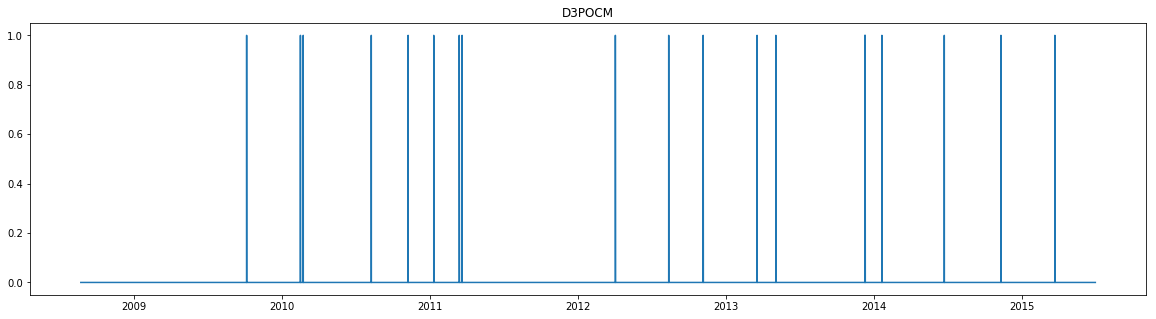

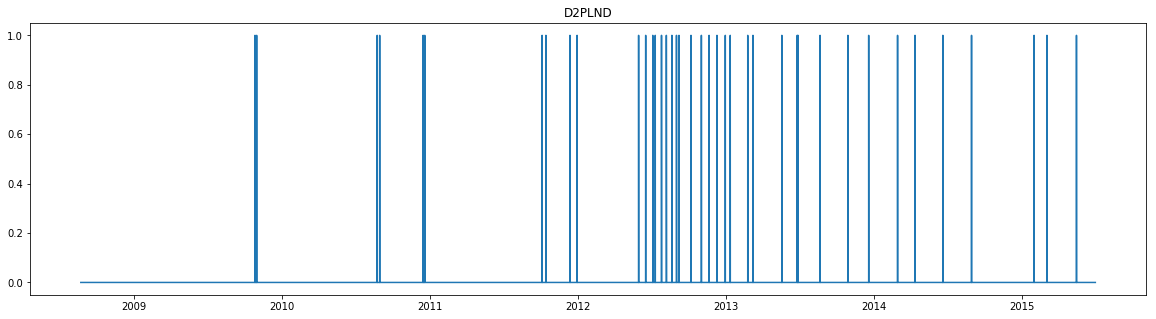

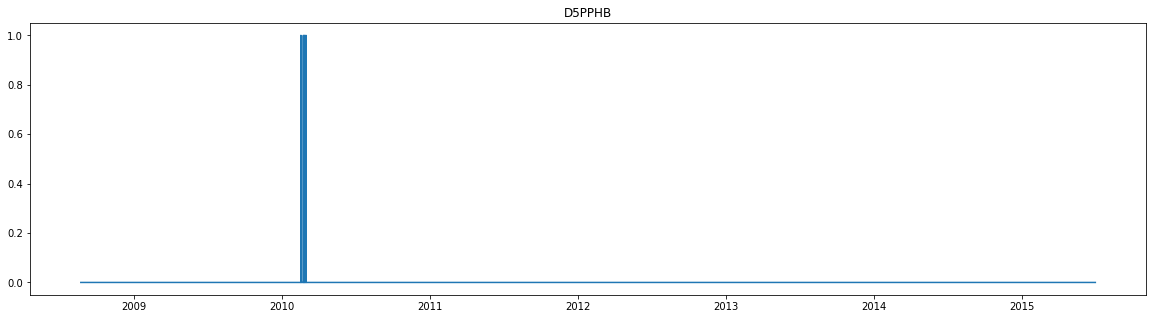

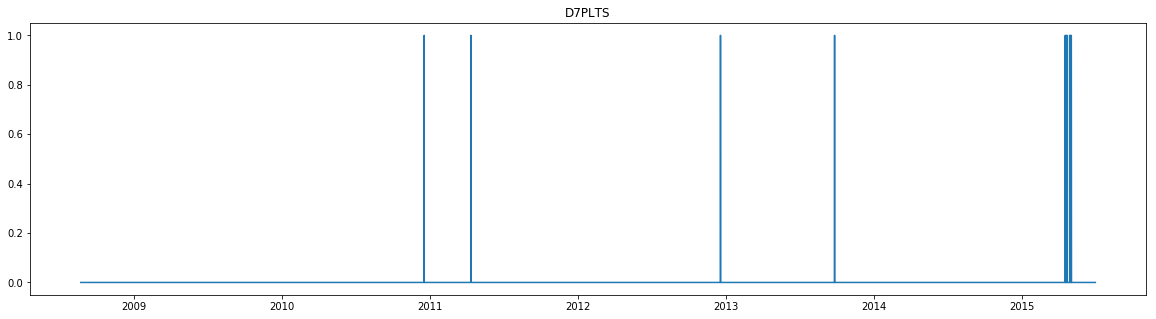

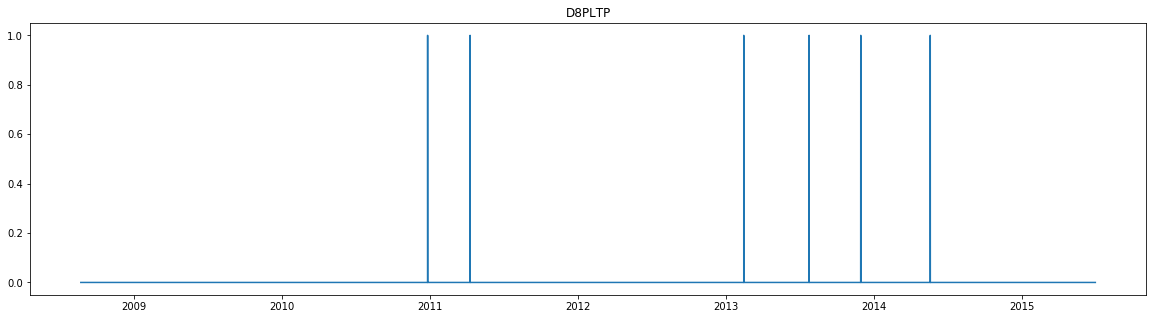

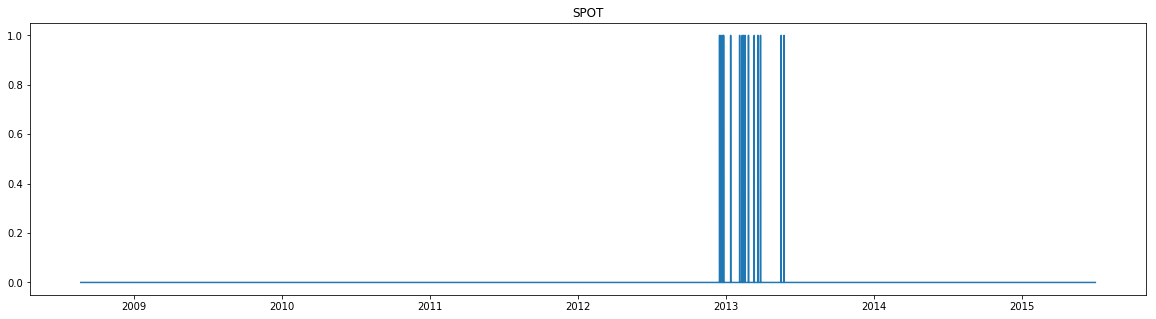

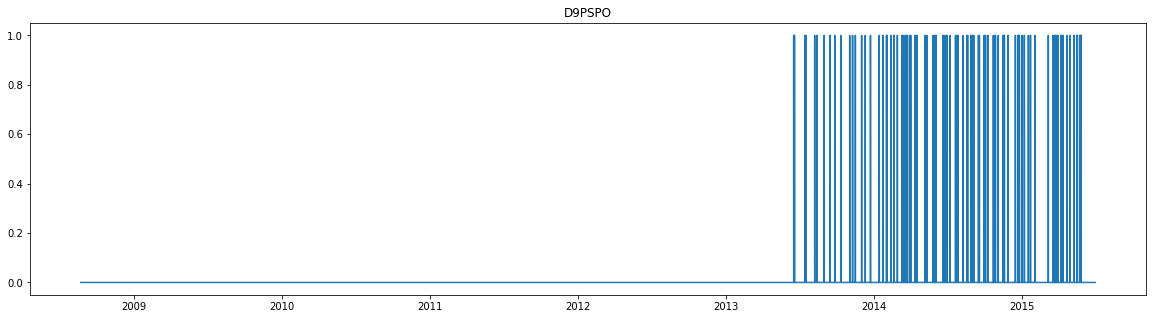

In [61]:
for i, name in enumerate(names[:-1]):
    plt.figure(num=i, figsize=(20,5))
    plt.plot(ftl_hour[name])
    #plt.yticks([0,1,2])
    plt.title(name)

In [62]:
ftl_hour.to_csv("../data/hackathon/ftl_df.csv")